# Testing environment

In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def listing_files(startpath):
    """
    This programm retrieve a list of available files in our actual root tree for a specific file format
    """
    formatfile=input("Please define your format file: ")
    return [os.path.join(root,f) for root,dirs,files in os.walk(startpath) for f in files if f.endswith(formatfile)]

In [3]:
def acquire_data():
    """
    This function will retrieve the valuable data for this case study
    It will ask you wich document index do you want to analyze (via printed 
    info in you screen). It will automattically stop the programm if your input
    is not in the indexes list. You are suposse to be smart enough to define 
    your input as an integer
    """
    files=listing_files('./')
    counter=-1;
    print("")
    print("Available files: ")
    if files!=[]:
        for item in files:
            counter+=1
            print("Index: ",counter," >> ",item)
    else:
        print("Index:       >>      ")
    print("")
    try:
        if files==[]:
            raise ValueError
        index_dat=int(input("Please define your file index showed above: "))
        if index_dat not in range(len(files)):
            raise ImportError
    except ImportError:
        print(chr(27)+"[1;31m"+("INT not in indexes list").upper()+chr(27)+"[0m"+"")
    except ValueError:
        print(chr(27)+"[1;31m"+"NO FILES FOUND FOR THE FILE FORMAT YOU HAVE DEFINED ABOVE"+chr(27)+"[0m"+"")
    else:
        print("")
        print(chr(27)+"[1;32m"+"Successfully loaded  "+u'\u2713'+chr(27)+"[0m"+"")
        print("")
        return pd.read_csv(files[index_dat],encoding = "ISO-8859-1")

In [17]:
data=acquire_data()

Please define your format file: csv

Available files: 
Index:  0  >>  ./global-shark-attack-incidents/GSAF5.csv

Please define your file index showed above: 0

Successfully loaded  ✓



In [5]:
def wrangle(df):
    """
    This function first cleans all rows for Counttry Attribute with nan values
    Then it filter the data for an input Country defined by the user
    """
    df=df.dropna(subset=['Country']) # First nan values removal
    list_countries=df['Country'].unique()
    country_in='MARS'
    counter=0
    try:
        while country_in.upper() not in list_countries:
            print("")
            country_in=input("Iteration >> %s | Which country do you want to analyze (use lowercase)?: " %counter)
            print("")
            counter+=1
            if counter==5:
                raise IOError
            if country_in.upper() in list_countries and len(df[df['Country']==country_in])<10:
                counter=0
                print('Not enough registers for %s' %country_in)
                country_in='MARS'
    except IOError:
        print("")
        print(chr(27)+"[1;31m"+("I am bored of you pulling my leg").upper()+chr(27)+"[0m"+"")
        print("AGUR!")
        print("")
    else:
        return df[df['Country']==country_in.upper()],country_in.upper()

In [18]:
filtered_data,country=wrangle(data)
print("Country: ",country)
display(filtered_data.head())


Iteration >> 0 | Which country do you want to analyze (use lowercase)?: australia

Country:  AUSTRALIA


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,...,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,5988,NaN,NaN
10,2016.09.05.a,05-Sep-16,2016,Unprovoked,AUSTRALIA,Western Australia,Injidup,Surfing,Fraser Penman,M,...,NaN,"Perth Now, 9/5/2016",2016.09.05.a-Penman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.a,2016.09.05.a,5983,NaN,NaN
22,2016.07.28,28-Jul-16,2016,Boat,AUSTRALIA,Western Australia,Near Albany,Kayaking,Ian Watkins,M,...,White shark,"ABC Australia, 7/28/2016",2016.07.28-Watkins.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.28,2016.07.28,5971,NaN,NaN


In [44]:
def analyze(df):
    """
    This function filters the data of a dataframe for injured and fatal registers
    It also returns the number of Shark attacks by Activity, The TOP 10
    """
    df=df.dropna(subset=['Fatal (Y/N)']) # First we delete all rows with this attribute equal to NaN
    fatal_count=(df[df['Fatal (Y/N)']=='Y'])['Area'].value_counts().reset_index()
    fatal_count.columns=['Area','Count']
    injured_count=(df[df['Fatal (Y/N)']=='N'])['Area'].value_counts().reset_index()
    injured_count.columns=['Area','Count']
    activity_count=df['Activity'].value_counts()
    if len(activity_count)>10:
        activity_count=activity_count[:10]
    activity_count=activity_count.reset_index()
    activity_count.columns=['Activity','Count']
    return fatal_count,injured_count,activity_count
    
    

In [45]:
fatal,injured,activity=analyze(filtered_data)

In [46]:
print("Fatal")
display(fatal)
print("")
print("Injured")
display(injured)
print("")
print("Activty")
display(activity)

Fatal


,Area,Count
0,New South Wales,127
1,Queensland,85
2,Western Australia,35
3,South Australia,28
4,Torres Strait,23
5,Victoria,21
6,Tasmania,10
7,Northern Territory,3
8,Torres Strait,1
9,Victoria,1



Injured


,Area,Count
0,New South Wales,331
1,Queensland,208
2,Western Australia,125
3,South Australia,73
4,Victoria,57
5,Torres Strait,47
6,Tasmania,31
7,Northern Territory,19
8,Territory of Cocos (Keeling) Islands,1
9,Norfolk Island,1



Activty


,Activity,Count
0,Surfing,170
1,Swimming,151
2,Fishing,111
3,Spearfishing,67
4,Bathing,58
5,Diving,29
6,Pearl diving,28
7,Snorkeling,18
8,Scuba diving,17
9,Wading,14


In [74]:
def reporting(fatal,injured,activity):
    
    destination=os.path.join(os.getcwd(),'Output')
    if not os.path.exists(destination):
        os.mkdir(destination)
        
    fig=plt.figure(figsize=(15,7))

    barchart = sns.barplot(data=fatal, x='Area', y='Count')
    title = 'Top 10 Areas by Fatalities for %s' %country
    plt.xticks(rotation=45)
    plt.title(title + "\n", fontsize=16)
    
    final=os.path.join(destination,title)
    fig.savefig(final + '.png')
    

    fig=plt.figure(figsize=(15,7))

    barchart = sns.barplot(data=injured, x='Area', y='Count')
    title = 'Top 10 Areas by Injured registers for %s' %country
    plt.xticks(rotation=45)
    plt.title(title + "\n", fontsize=16)
    
    final=os.path.join(destination,title)
    fig.savefig(final + '.png')
    

    fig=plt.figure(figsize=(15,7))

    barchart = sns.barplot(data=activity, x='Activity', y='Count')
    title = 'Top 10 Dangerous Activities for %s' %country
    plt.xticks(rotation=45)
    plt.title(title + "\n", fontsize=16)
    
    final=os.path.join(destination,title)
    fig.savefig(final + '.png')

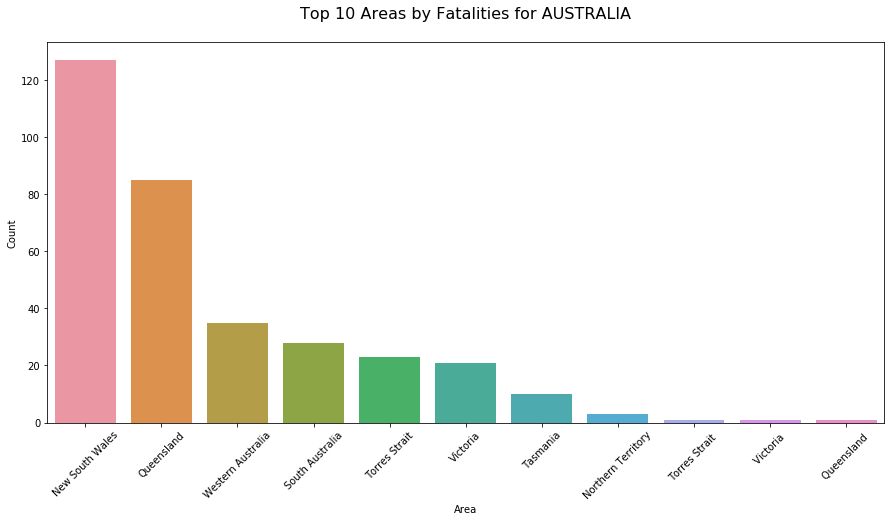

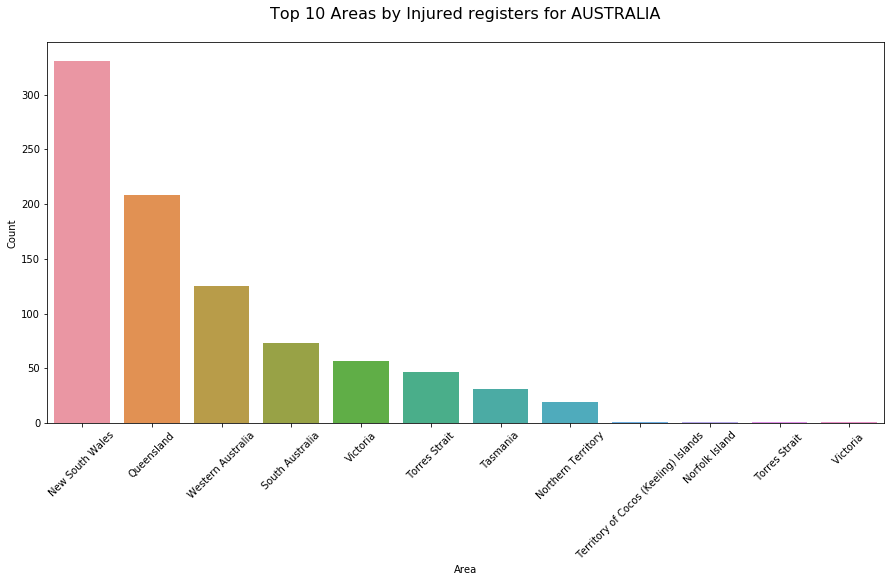

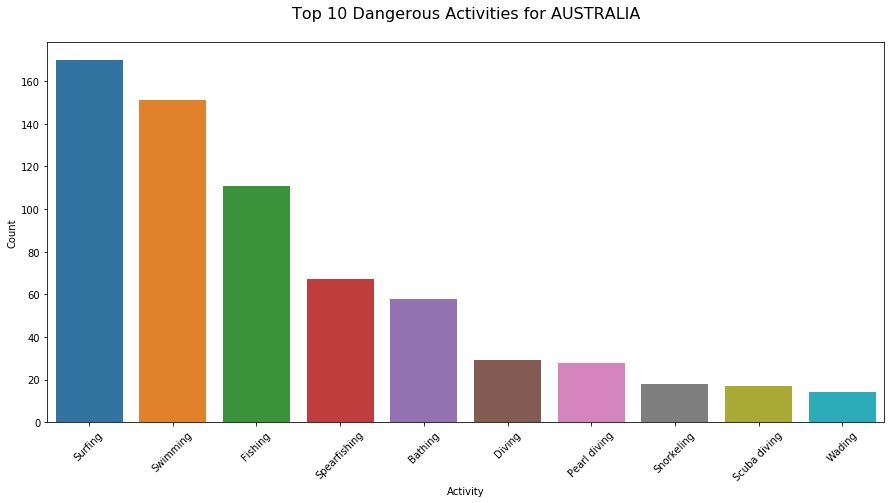

In [75]:
reporting(fatal,injured,activity)